/var/folders/9p/dm8ssc490bvf953k5btv8gh00000gn/T/ipykernel_27149/112295313.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_vertexes = np.array(v[7:7 + case.obs_num], dtype=np.int)
/var/folders/9p/dm8ssc490bvf953k5btv8gh00000gn/T/ipykernel_27149/112295313.py:57: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you 

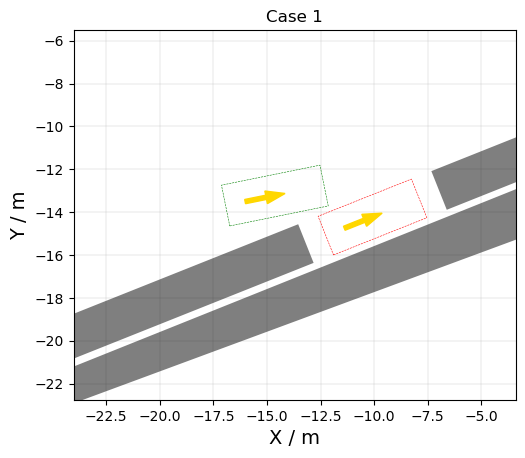

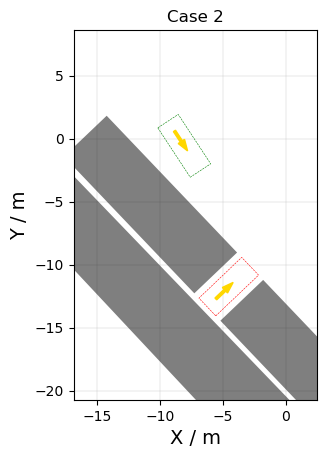

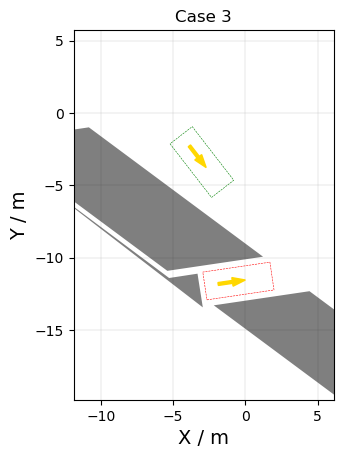

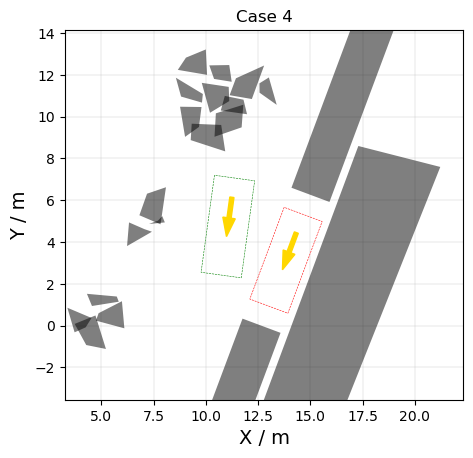

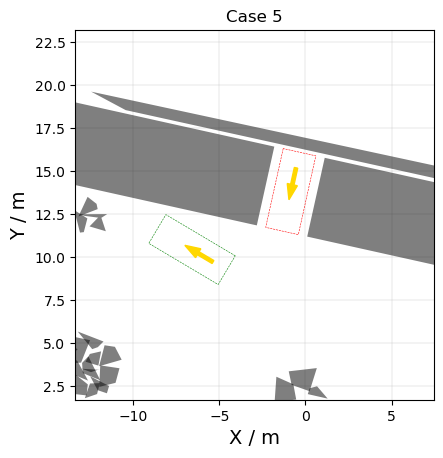

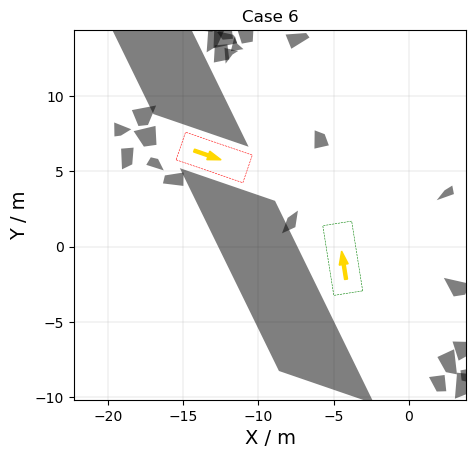

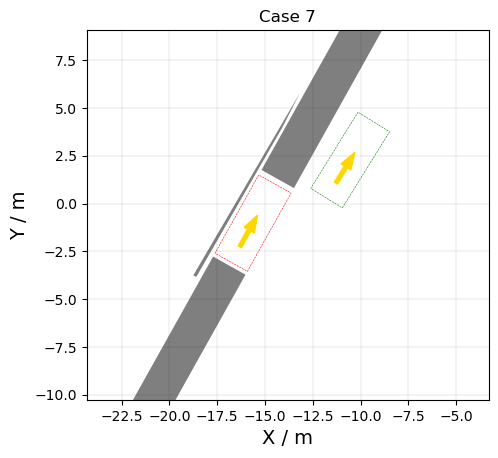

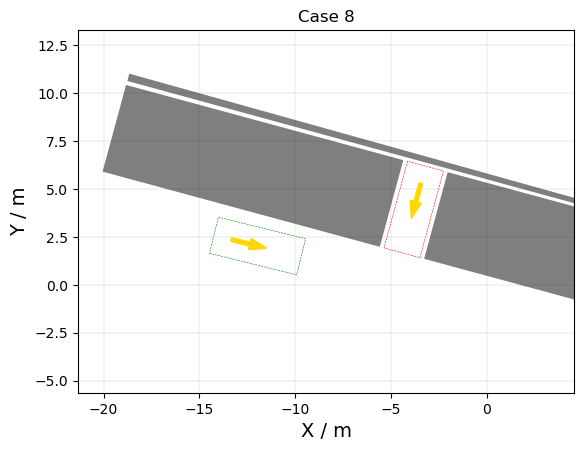

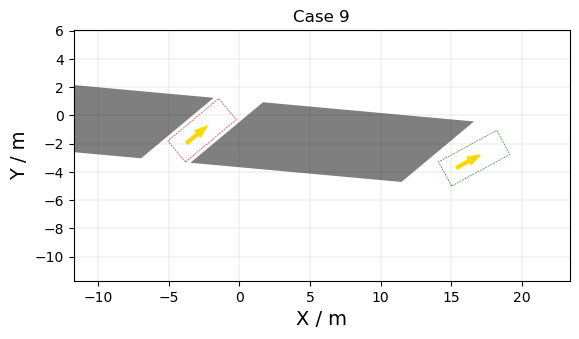

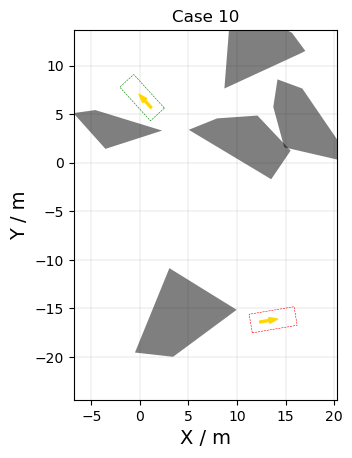

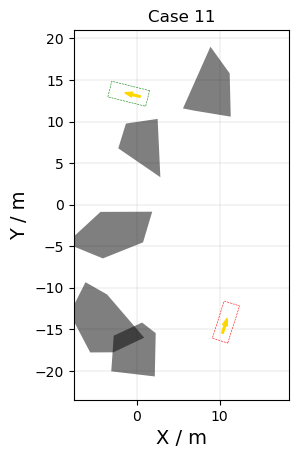

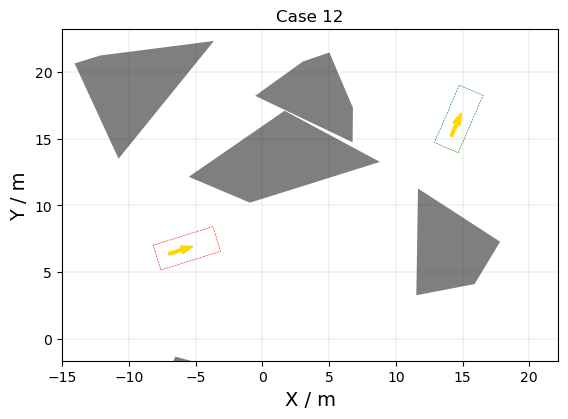

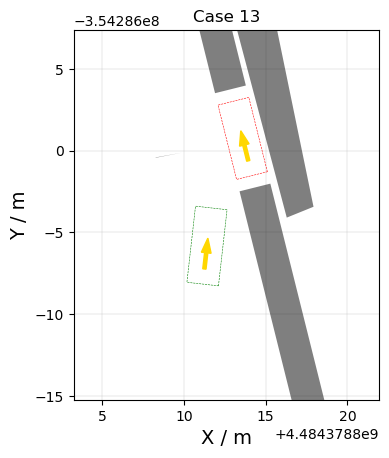

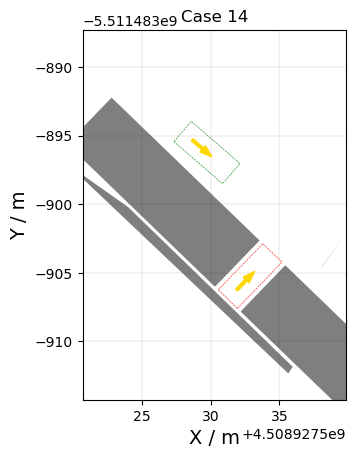

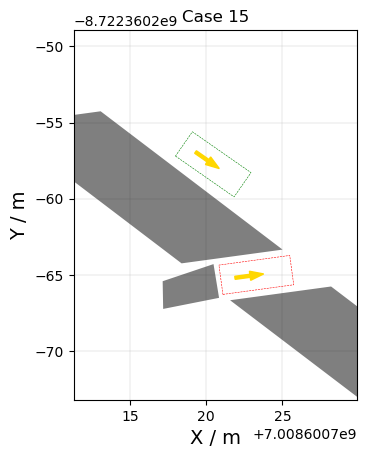

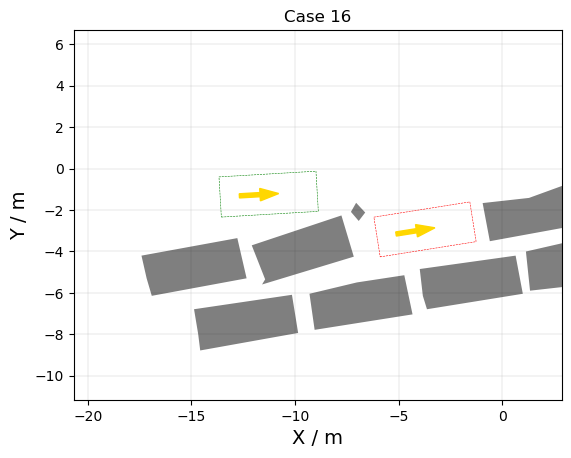

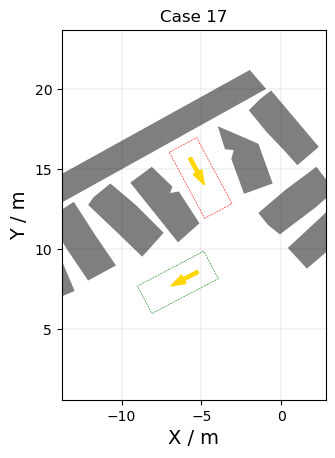

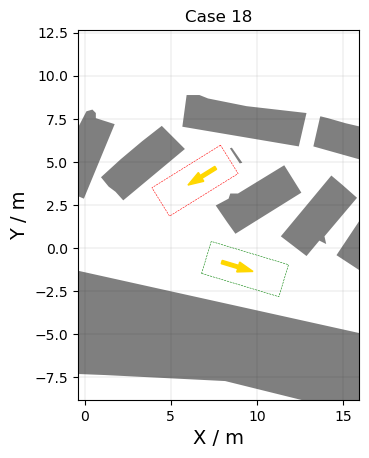

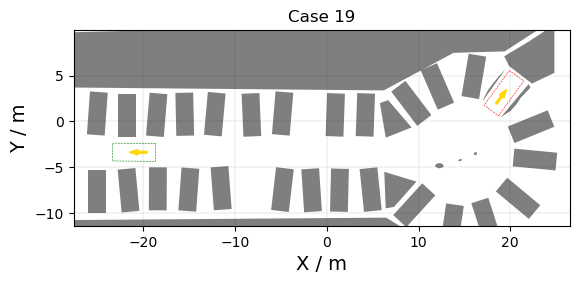

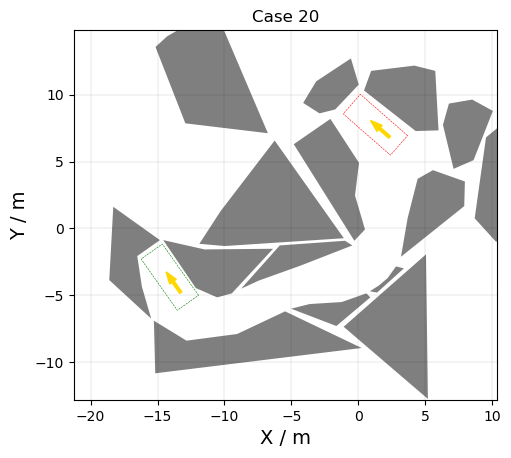

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv


class Vehicle:
    def __init__(self):
        self.lw = 2.8  # wheelbase
        self.lf = 0.96  # front hang length
        self.lr = 0.929  # rear hang length
        self.lb = 1.942  # width

    def create_polygon(self, x, y, theta):
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)

        points = np.array([
            [-self.lr, -self.lb / 2, 1],
            [self.lf + self.lw, -self.lb / 2, 1],
            [self.lf + self.lw, self.lb / 2, 1],
            [-self.lr, self.lb / 2, 1],
            [-self.lr, -self.lb / 2, 1],
        ]).dot(np.array([
            [cos_theta, -sin_theta, x],
            [sin_theta, cos_theta, y],
            [0, 0, 1]
        ]).transpose())
        return points[:, 0:2]


class Case:
    def __init__(self):
        self.x0, self.y0, self.theta0 = 0, 0, 0
        self.xf, self.yf, self.thetaf = 0, 0, 0
        self.xmin, self.xmax = 0, 0
        self.ymin, self.ymax = 0, 0
        self.obs_num = 0
        self.obs = np.array([])
        self.vehicle = Vehicle()

    @staticmethod
    def read(file):
        case = Case()
        with open(file, 'r') as f:
            reader = csv.reader(f)
            tmp = list(reader)
            v = [float(i) for i in tmp[0]]
            case.x0, case.y0, case.theta0 = v[0:3]
            case.xf, case.yf, case.thetaf = v[3:6]
            case.xmin = min(case.x0, case.xf) - 8
            case.xmax = max(case.x0, case.xf) + 8
            case.ymin = min(case.y0, case.yf) - 8
            case.ymax = max(case.y0, case.yf) + 8

            case.obs_num = int(v[6])
            num_vertexes = np.array(v[7:7 + case.obs_num], dtype=np.int)
            vertex_start = 7 + case.obs_num + (np.cumsum(num_vertexes, dtype=np.int) - num_vertexes) * 2
            case.obs = []
            for vs, nv in zip(vertex_start, num_vertexes):
                case.obs.append(np.array(v[vs:vs + nv * 2]).reshape((nv, 2), order='A'))
        return case


def main():
    for i in range(0, 20):
        plt.figure()
        case = Case.read('Case%d.csv' % (i + 1))
        plt.xlim(case.xmin, case.xmax)
        plt.ylim(case.ymin, case.ymax)
        plt.gca().set_aspect('equal', adjustable = 'box')
        plt.gca().set_axisbelow(True)
        plt.title('Case %d' % (i + 1))
        plt.grid(linewidth = 0.2)
        plt.xlabel('X / m', fontsize = 14)
        plt.ylabel('Y / m', fontsize = 14)

        for j in range(0, case.obs_num):
            plt.fill(case.obs[j][:, 0], case.obs[j][:, 1], facecolor = 'k', alpha = 0.5)

        plt.arrow(case.x0, case.y0, np.cos(case.theta0), np.sin(case.theta0), width=0.2, color = "gold")
        plt.arrow(case.xf, case.yf, np.cos(case.thetaf), np.sin(case.thetaf), width=0.2, color = "gold")
        temp = case.vehicle.create_polygon(case.x0, case.y0, case.theta0)
        plt.plot(temp[:, 0], temp[:, 1], linestyle='--', linewidth = 0.4, color = 'green')
        temp = case.vehicle.create_polygon(case.xf, case.yf, case.thetaf)
        plt.plot(temp[:, 0], temp[:, 1], linestyle='--', linewidth = 0.4, color = 'red')
    plt.show()


if __name__ == "__main__":
    main()